Data loaded successfully. Shape: (9127525, 37)
             Gender           Age  Previously_Insured  Vehicle_Damage  \
count  9.127525e+06  9.127525e+06        9.127525e+06    9.127525e+06   
mean   5.351836e-01  3.753553e+01        4.891942e-01    4.814514e-01   
std    4.987606e-01  1.491480e+01        4.998832e-01    4.996559e-01   
min    0.000000e+00  2.000000e+01        0.000000e+00    0.000000e+00   
25%    0.000000e+00  2.400000e+01        0.000000e+00    0.000000e+00   
50%    1.000000e+00  3.400000e+01        0.000000e+00    0.000000e+00   
75%    1.000000e+00  4.800000e+01        1.000000e+00    1.000000e+00   
max    1.000000e+00  8.500000e+01        1.000000e+00    1.000000e+00   

       Annual_Premium       Vintage      Response  Vehicle_Age_< 1 Year  \
count    9.127525e+06  9.127525e+06  9.127525e+06          9.127525e+06   
mean     3.578530e+04  1.639887e+02  1.209173e-01          4.746327e-01   
std      8.732908e+03  7.994702e+01  3.260312e-01          4.993561e-0

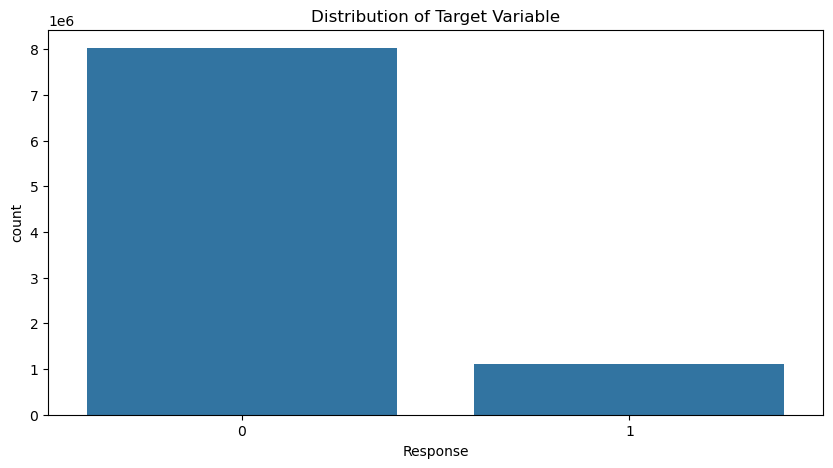

Missing values in each column:
Gender                        0
Age                           0
Previously_Insured            0
Vehicle_Damage                0
Annual_Premium                0
Vintage                       0
Response                      0
Vehicle_Age_< 1 Year          0
Vehicle_Age_> 2 Years         0
Region_Code_11.0              0
Region_Code_14.0              0
Region_Code_15.0              0
Region_Code_18.0              0
Region_Code_2.0               0
Region_Code_21.0              0
Region_Code_28.0              0
Region_Code_29.0              0
Region_Code_3.0               0
Region_Code_30.0              0
Region_Code_33.0              0
Region_Code_35.0              0
Region_Code_36.0              0
Region_Code_37.0              0
Region_Code_41.0              0
Region_Code_45.0              0
Region_Code_46.0              0
Region_Code_47.0              0
Region_Code_50.0              0
Region_Code_6.0               0
Region_Code_8.0               0
Region_Co

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Cell 2: Load Data
df = pd.read_csv('transformed__train_dataframe.csv')
print(f"Data loaded successfully. Shape: {df.shape}")
df.head()

# Cell 3a: Summary Statistics
summary = df.describe(include='all')
print(summary)

# Cell 3b: Distribution of Target Variable
plt.figure(figsize=(10, 5))
sns.countplot(x='Response', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Cell 3c: Check for Missing Values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Cell 4a: Random Sampling
sample_size = 100000  # Define the sample size you want
random_sample_df = df.sample(n=sample_size, random_state=42)
print(f"Random sample shape: {random_sample_df.shape}")
print(random_sample_df['Response'].value_counts(normalize=True))

# Cell 4b: Stratified Sampling
stratified_sample_df, _ = train_test_split(df, stratify=df['Response'], test_size=0.9, random_state=42)
print(f"Stratified sample shape: {stratified_sample_df.shape}")
print(stratified_sample_df['Response'].value_counts(normalize=True))

# Cell 4c: Feature Selection (Optional)
selector = VarianceThreshold(threshold=0.01)
X = stratified_sample_df.drop('Response', axis=1)
y = stratified_sample_df['Response']
X_new = selector.fit_transform(X)
selected_features = X.columns[selector.get_support(indices=True)]
sample_df = pd.DataFrame(X_new, columns=selected_features)
sample_df['Response'] = y.reset_index(drop=True)
print(f"Selected features sample shape: {sample_df.shape}")
